Занятие 4. Кластеризация методом k-means (k-средних).
=============

Полезные ссылки:
* http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
* http://scikit-learn.org/stable/modules/clustering.html

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os

Пример 1. Beverage
--------

In [2]:
os.chdir("C:/Users/USER/Documents/Python/_Python_part_1_Lectures/Shad_Python_04_2/1_beverage/")

In [4]:
df = pd.read_csv("beverage_r.csv", sep=";", index_col='numb.obs')
df.head()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
numb.obs,,,,,,,,
1,1,0,0,0,1,1,0,1
2,1,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0
4,0,1,0,1,0,0,1,0
5,1,0,0,0,1,0,0,0


В scikit-learn процедура настройки и использования моделей часто проходит по одной и той же схеме:
1. Инициализация модели, задание её параметров,
2. Подгонка модели (метод fit и/или fit_transform),
3. Предсказание для новых наблюдений (метод predict).

Для кластеризации методом k-means необходимо задать k наперёд. Попробуем k = 2. 

In [5]:
from sklearn.cluster import KMeans
# инициализация модели
model = KMeans(n_clusters=3, random_state=42, max_iter=300, n_init=10, , verbose=0 )
# random_state - зерно датчика случайных чисел. 
# При каждом новом вызове с одинаковыми random_state модель будет давать
# одинаковые результаты.

In [7]:
# подгонка модели по данным из df
model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [8]:
# Результат кластеризации на данных df
model.labels_

array([0, 2, 2, 1, 2, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1])

In [9]:
# координаты центров кластеров
model.cluster_centers_

array([[ 7.27272727e-01,  2.72727273e-01,  9.09090909e-02,
         9.09090909e-02,  4.54545455e-01,  1.00000000e+00,
         9.09090909e-02,  4.54545455e-01],
       [ 1.11022302e-16,  1.00000000e+00,  5.45454545e-01,
         5.45454545e-01, -5.55111512e-17, -5.55111512e-17,
         9.09090909e-01,  0.00000000e+00],
       [ 1.00000000e+00,  2.50000000e-01,  8.33333333e-02,
        -2.77555756e-17,  9.16666667e-01, -5.55111512e-17,
        -5.55111512e-17,  3.33333333e-01]])

In [14]:
# предсказание для новых наблюдений. Метод predict.
new_items = [
    [1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0]
]
model.predict(new_items)

array([1, 0], dtype=int32)

Модель выше разбивала на два кластера. 
Как определить число кластеров?
Применим модель для разного числа кластеров, чтобы построить график каменистой осыпи. Метод ```inertia_``` вернёт сумму расстояний от каждой точки данных до центра ближайшего у ней кластера. Таким образом, кластеризацию можно считать условно хорошей, когда инерция перестаёт сильно уменьшаться при увеличении числа кластеров.

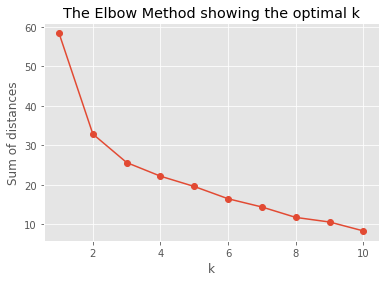

In [12]:
K = range(1, 11)
models = [KMeans(n_clusters=k, random_state=42).fit(df) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Допустим, мы решили, что три кластера -- это оптимальный выбор. Теперь хочется посмотреть на список наблюдений, составляющий данные кластеры, и посмотреть, чем они отличаются друг от друга. Для этого применим метод ```labels_```, а затем посчитаем средние значения факторов для каждого кластера.

In [13]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df)
df['cluster'] = model.labels_
df.groupby('cluster').mean()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
cluster,,,,,,,,
0,0.727273,0.272727,0.090909,0.090909,0.454545,1.0,0.090909,0.454545
1,0.000000,1.000000,0.545455,0.545455,0.000000,0.0,0.909091,0.000000
2,1.000000,0.250000,0.083333,0.000000,0.916667,0.0,0.000000,0.333333


In [14]:
df.groupby('cluster').size()

cluster
0    11
1    11
2    12
dtype: int64

Пример 2
-------

In [16]:
os.chdir("C:/Users/USER/Documents/Python/_Python_part_1_Lectures/Shad_Python_04_2/2_pretendent")

In [17]:
df = pd.read_csv('assess.dat', sep='\t', index_col='NAME')
df.head()

,NR,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
NAME,,,,,,,,,,,
Volker,1,10,10,9,10,10,10,9,10,10,9
Sigrid,2,10,10,4,10,5,5,4,5,4,3
Elmar,3,5,4,10,5,10,4,10,5,3,10
Peter,4,10,10,9,10,10,10,9,10,10,9
Otto,5,4,3,5,4,3,10,4,10,10,5


In [18]:
# В колонке NR находится номер объекта, его нужно исключить из данных для кластеризации
del df['NR']

In [19]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(df)
df['cluster'] = model.labels_
df.groupby('cluster').mean()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
cluster,,,,,,,,,,
0,4.8,4.4,4.00,4.0,4.20,10.0,4.40,10.00,10.00,5.00
1,4.2,4.8,10.00,4.4,10.00,4.4,10.00,4.00,3.80,10.00
2,10.0,10.0,4.25,10.0,4.75,4.5,3.75,4.25,4.25,4.25
3,10.0,10.0,9.00,10.0,10.00,9.5,9.25,9.75,10.00,9.50


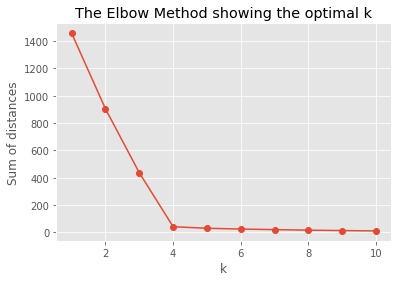

In [20]:
K = range(1, 11)
models = [KMeans(n_clusters=k, random_state=42).fit(df) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Пример 3. Потребление протеинов в Европе
---------------------

In [21]:
os.chdir("C:/Users/USER/Documents/Python/_Python_part_1_Lectures/Shad_Python_04_2/3_Protein Consumption in Europe")

In [22]:
df = pd.read_csv('Protein Consumption in Europe.csv', sep=';', decimal=',', index_col='Country')
df.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Country,,,,,,,,,
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [23]:
# Стандартизируем данные
from sklearn import preprocessing
norm = preprocessing.StandardScaler()
norm.fit(df)
X = norm.transform(df)

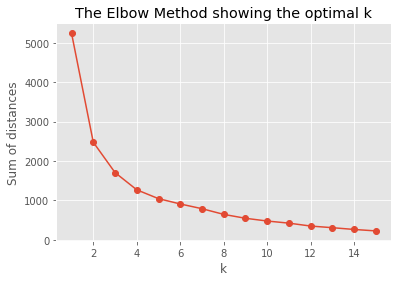

In [24]:
K = range(1, 16)
models = [KMeans(n_clusters=k).fit(df) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [25]:
model = KMeans(n_clusters=6)
model.fit(df)
df['cluster'] = model.labels_
df.groupby('cluster').mean()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
cluster,,,,,,,,,
0,7.300000,11.333333,2.800000,13.833333,1.766667,36.833333,4.966667,2.833333,4.933333
1,13.212500,10.637500,3.987500,21.162500,3.375000,24.700000,4.650000,2.062500,4.175000
2,6.133333,5.766667,1.433333,9.633333,0.933333,54.066667,2.400000,4.900000,3.400000
3,9.850000,7.050000,3.150000,26.675000,8.225000,22.675000,4.550000,1.175000,2.125000
4,9.650000,3.525000,2.075000,14.200000,3.125000,41.100000,2.825000,5.250000,4.450000
5,7.233333,6.233333,2.633333,8.200000,8.866667,26.933333,6.033333,3.800000,6.233333


In [26]:
df['cluster'].sort_values()

Country
Czechoslovakia    0
Poland            0
Hungary           0
UK                1
Austria           1
Belgium           1
Switzerland       1
Netherlands       1
W_Germany         1
France            1
Ireland           1
Yugoslavia        2
Bulgaria          2
Romania           2
Finland           3
Norway            3
Denmark           3
Sweden            3
USSR              4
Albania           4
Greece            4
Italy             4
Portugal          5
E_Germany         5
Spain             5
Name: cluster, dtype: int32